<a href="https://colab.research.google.com/github/rvoloder/walmart_sales/blob/main/Project_2_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1. Source of data: Kaggle

2. Brief Description of Data: Walmart Weekly Retail Sales (based on a variety of components - holidays, temperature, unemployment rate etc.)

3. Target: Weekly Sales

4. This is a regression problem.

5. Number of Features: 8

6. Number of Rows: 6435

7. What if any challenges: The dataset looks like a very nice machine learning dataset. As of now, I see no forseeable challenges.

In [4]:
df = pd.read_csv('/content/Walmart.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
df.shape

(6435, 8)

# Initial Analysis:

From the data above, we can already determine that the target column we will be attempting to predict is "Weekly_Sales". This will be a regression problem because we are determining a value (not class) of data. 

# Data Preparation:

Let's first take a look at our data. From the above .head(), it does not appear that we have any unnecessary columns. Let's check for duplicates:

In [6]:
df.duplicated().sum()

0

There appear to be no duplicates. Let's take a look to see if there are any missing values:

In [7]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

There are no missing values. Let's check to see if the datatypes seem logical:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


All data types seem to be logical. Let's check to see if there are any strange numerical datatypes:

In [9]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


All numerical values seem to make sense and are in a normal range. 

There do not appear to be many categorical columns. There is only one in fact and that is the date column. 

In [10]:
df['Date'].value_counts()

05-02-2010    45
23-12-2011    45
11-11-2011    45
18-11-2011    45
25-11-2011    45
              ..
07-01-2011    45
14-01-2011    45
21-01-2011    45
28-01-2011    45
26-10-2012    45
Name: Date, Length: 143, dtype: int64

When we look at a quick snapshot of all of the dates using value_counts, we don't notice any major inconsistancies. The dates appear to be in order, in the range given, and without any typos so we will assume that the data is clean and ready for further modification. 

# Data Exploration

Let's explore the data visually in univariate visualizations:

Let's first take a look at the distribution of weekly sales:

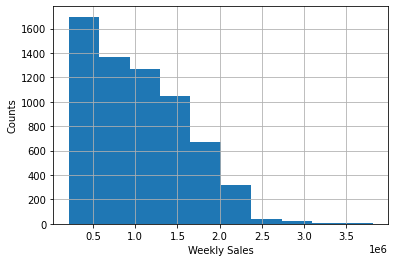

In [11]:
df['Weekly_Sales'].hist();
plt.xlabel('Weekly Sales');
plt.ylabel('Counts');

From here we see that the majority of weekly sales range from around 250,000 to 1.25 million dollars. We can therefore assume that most of our predictions would also lie in this range. 

Let's see how prevalent holidays are in our data:

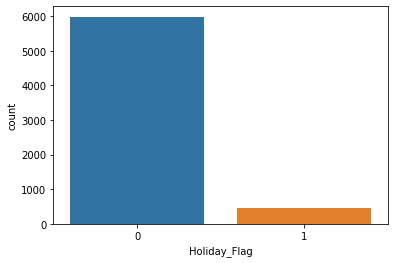

In [12]:
sns.countplot(x = 'Holiday_Flag', data = df);
## taken from: https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot

Here we see that only a very small amount of the days in our data account for holidays. There could be a correlation between these days and the few weeks in our data where sales were above 2 million dollars in a store. 

Let's check out our temperature ranges using a boxplot:

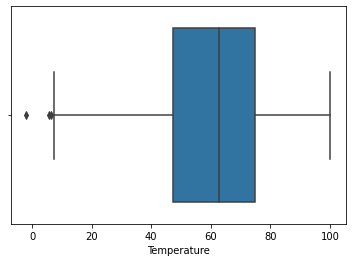

In [13]:
sns.boxplot(x = df["Temperature"]);

Here we see that most of our weeks, the temperature was in the range between 40 and 80 degrees farenheit with a few outliers (below 5 degrees farenheit). There could be a correlation sales and how hot or cold the week was (if it affected the sales positively or negatively). 

Let's do the same boxplot for our fuel prices:

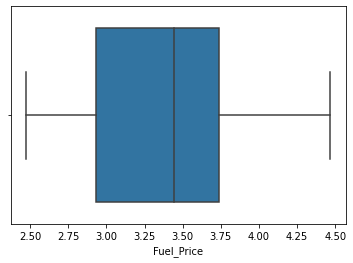

In [14]:
sns.boxplot(x = df["Fuel_Price"]);

Here there do not appear to be any noticeable outliers and the majority of fuel prices do appear to lie in a very small range between $2.75 per gallon and $3.75 per gallon. There could be lower sales in store areas where the price was above the $4.00 mark and that would be interesting to dive into a little deeper. 

Let's check out the unemployment rate:

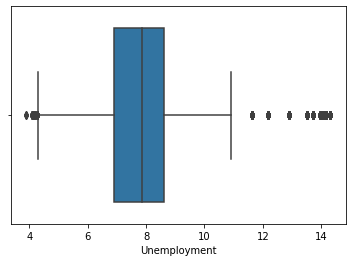

In [15]:
sns.boxplot(x = df["Unemployment"]);

Here we find that mostly the unemployment rate would range between 5 and 11%. Anything below and above that range could potentially have a significant impact on weekly sales as it shows whether or not people have more money to purchase items or not. 

We can further investigate this by examining the Consumer Price Index:

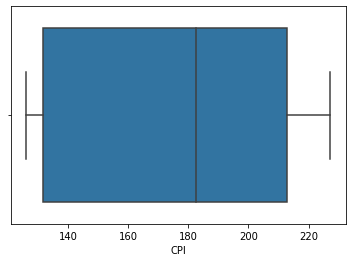

In [16]:
sns.boxplot(x = df["CPI"]);

The CPI appears to have remained largely stable so I don't believe it will have as large of an impact on our weekly sale predictions. I think unemployment rate may be more telling for our project. 

Let's have an overview of all factors using a correlation heat map:

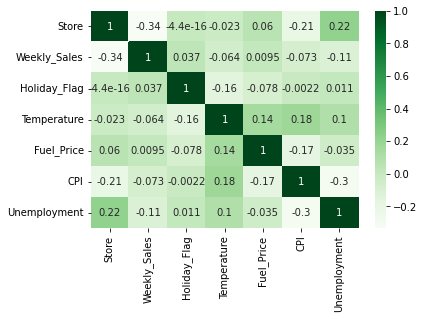

In [19]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True);

From our heatmap it is hard to find any definitive correlations between certain data factors and Weekly_Sales. The only values that do seem to be playing a slightly bigger role are Holiday_FLag and Fuel_Price which does make sense if we think of when shoppers would be out to spend more money.

There does seem to be a strong correlation between unemployment and the store associated with but that is also very logical as some stores are located in poorer neighborhoods (higher unemployment) and others in neighborhoods that are wealthier with lower unemployment. 

Let's take a look at weeks with holidays and sales for that week:

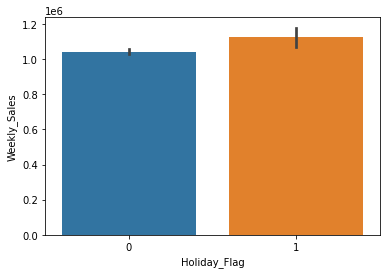

In [24]:
sns.barplot(data = df, x = 'Holiday_Flag', y = 'Weekly_Sales');

As we can see above, the weeks with holidays do appear to have higher sales numbers than those without. The difference is not huge, but big enough to be of interest to our company. This shows that when predicting sales or even demand in the future, we can expect 10-20% more in sales for that week. 

Let's also take a look at the unemployment correlation with particular stores (as it was our highest correlation factor):

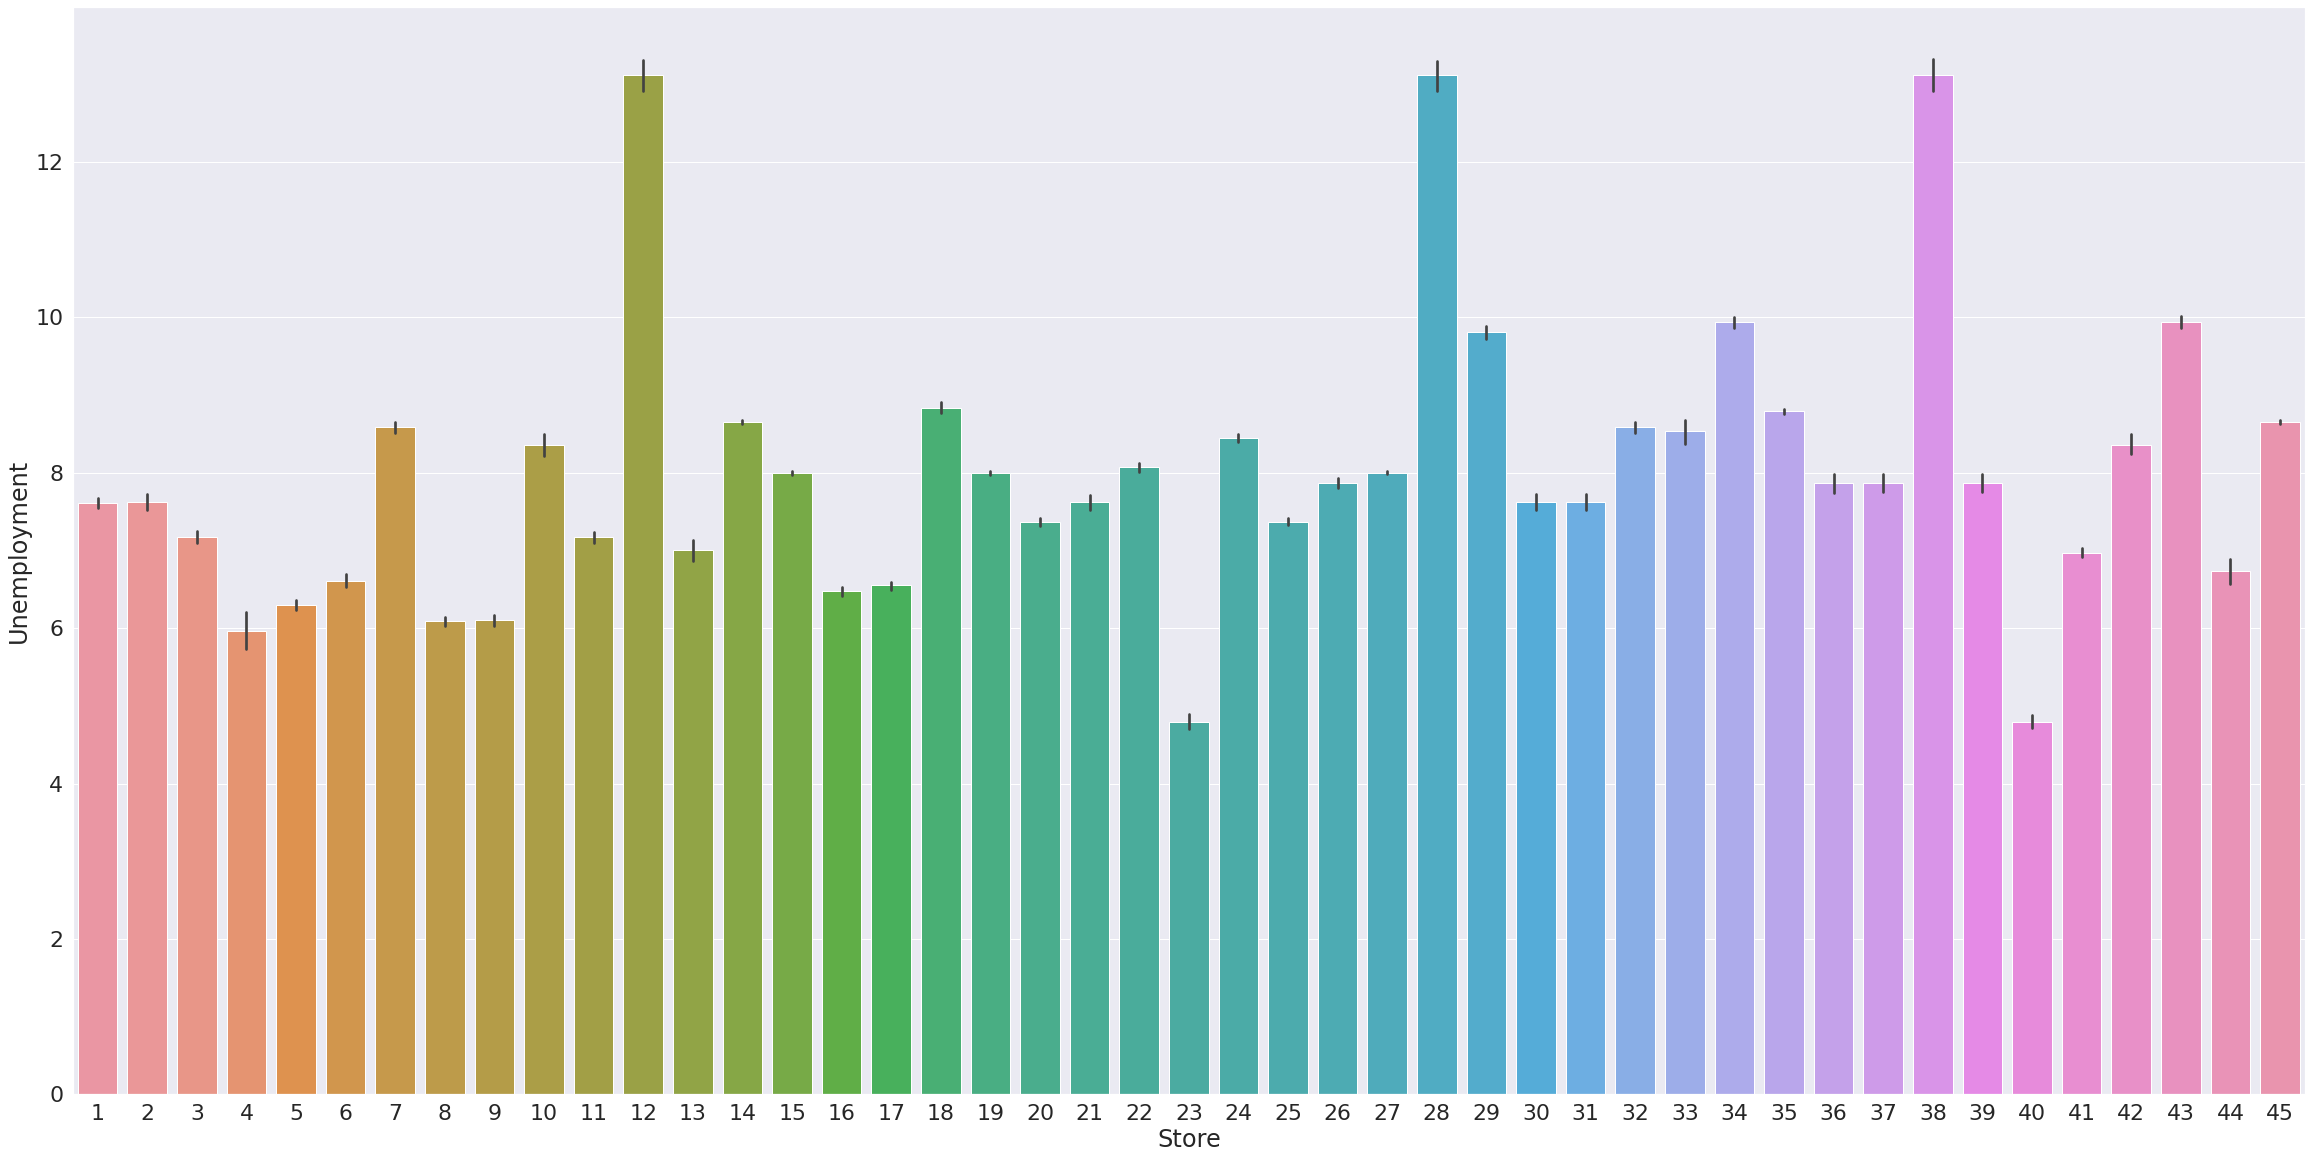

In [36]:
sns.barplot(data = df, x = 'Store', y = 'Unemployment');
sns.set(rc = {'figure.figsize':(40,20)})

From the graph above we can see that stores 12, 28, and 38 seem to have the highest level of unemployment in the area they are located in. This could have an effect on sales. Let's dive deeper:

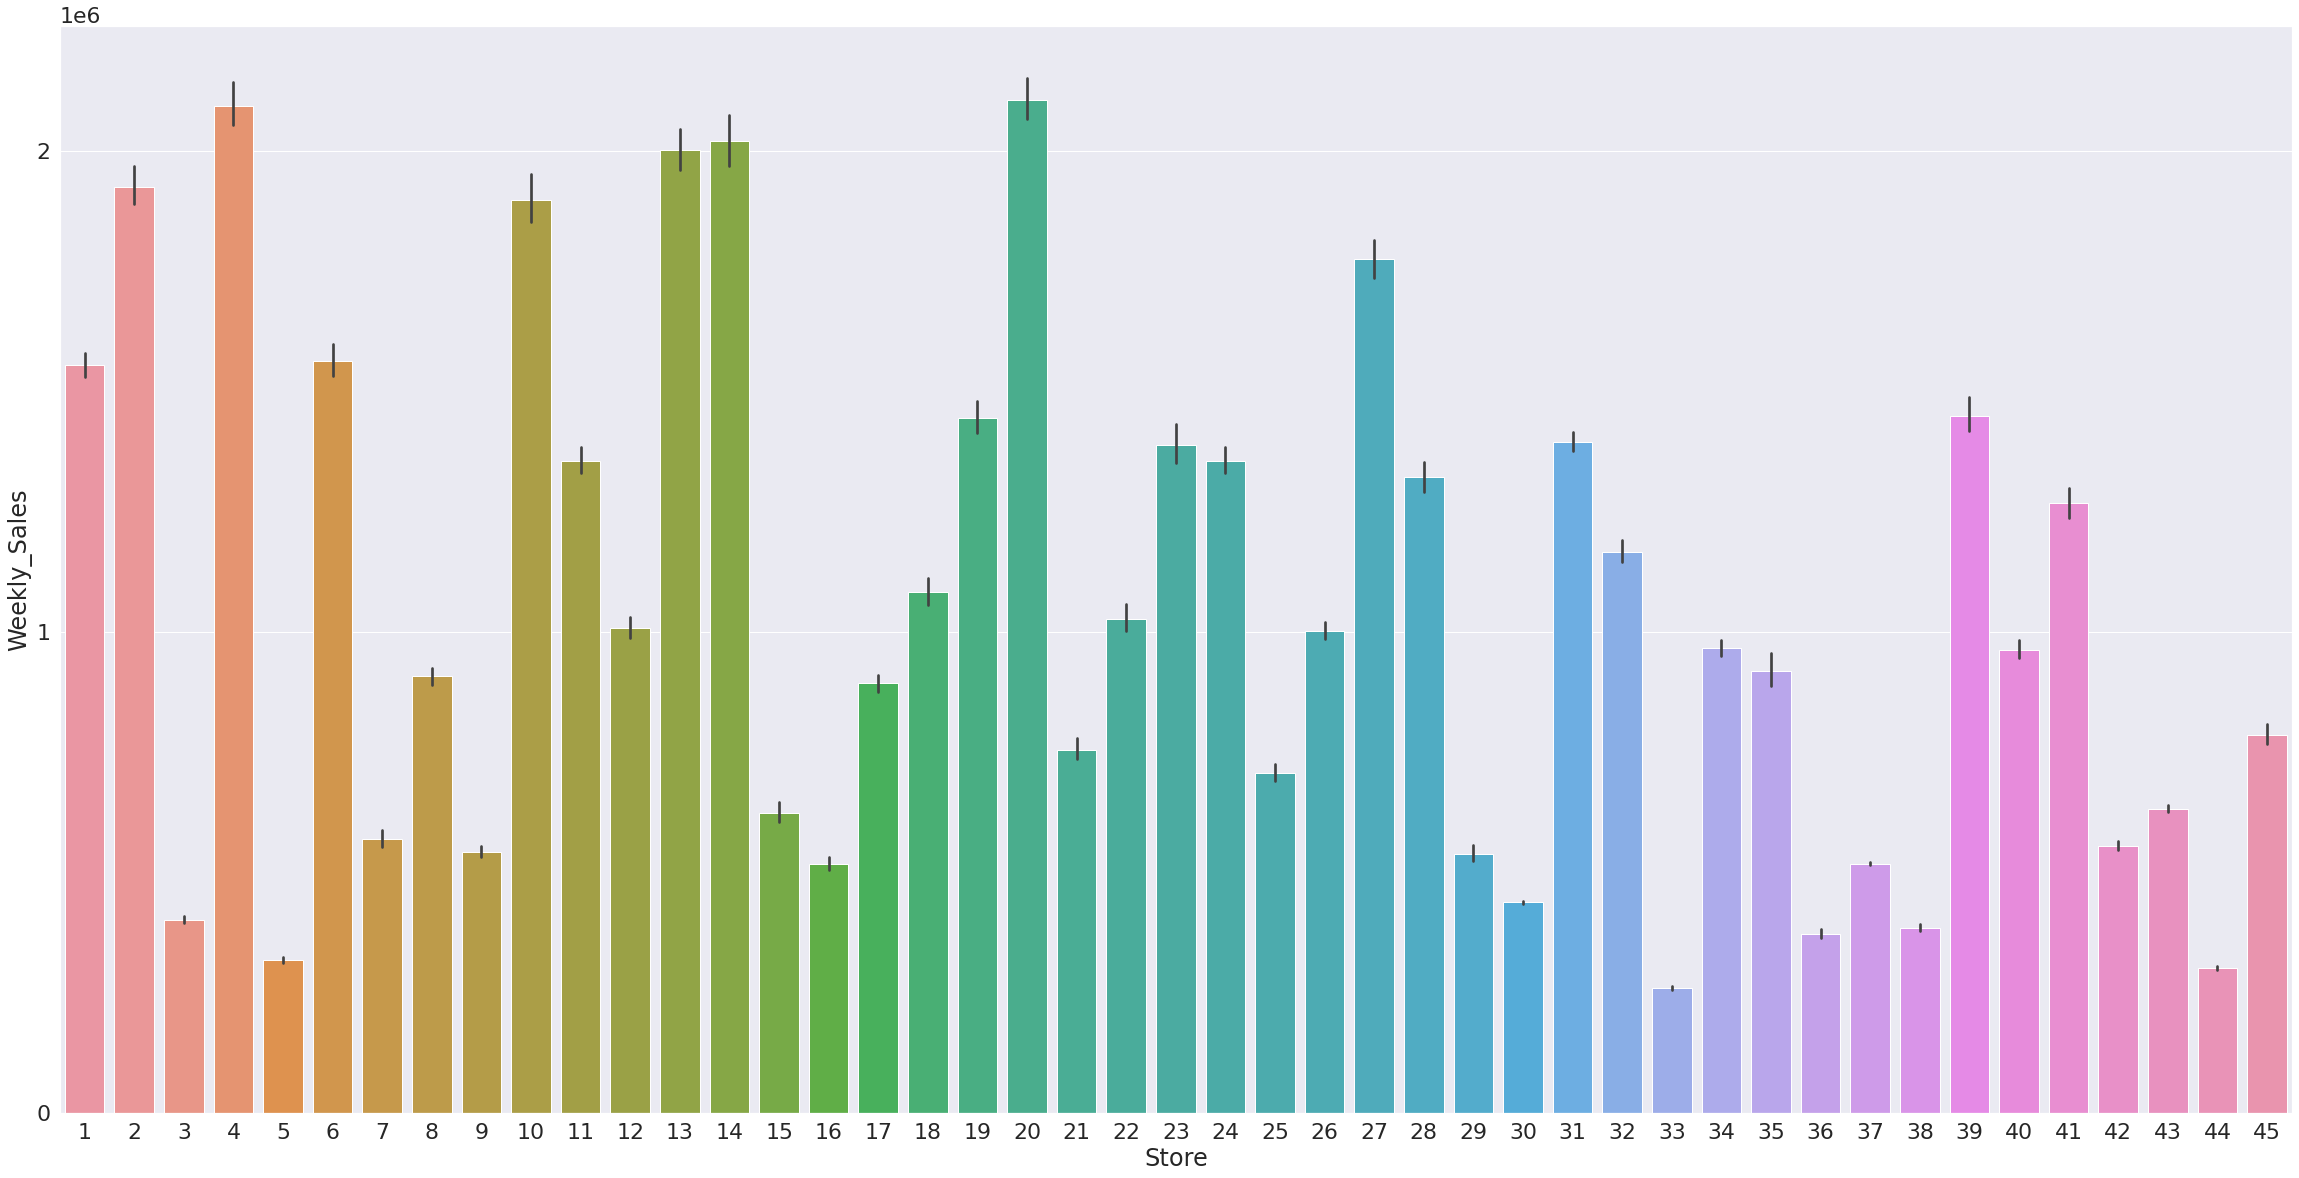

In [33]:
sns.barplot(data = df, x = 'Store', y = 'Weekly_Sales');
sns.set(rc = {'figure.figsize':(40,20)})
sns.set(font_scale=10)

In the graph above we see that stores with higher unemployment actually do seem to be performing very well. And that stores with relatively low unemployment (store 5 for example seem to be performing rather poorly. This list of poor performers might be of interest to our company. It is also interesting to note that poorer or lower income (i.e. employment) neighborhoods tend to perform better for Walmart. This would be important information for future planning. And could give us a good idea of what stores to invest in and, potentially, which ones to consider closing.